In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from time import time
import pandas as pd


In [2]:
cols = ["x_s","time_s", "Temp"] + [f"X{i}" for i in range(1, 48)] + ["rho", "v","p"] + [f"RDm{i}" for i in range(1, 47)] + [f"RDa{i}" for i in range(1, 47)] + [f"RVTm{i}" for i in range(1, 47)] + [f"RVTa{i}" for i in range(1, 47)] + [f"RVV{i}" for i in range(1, 47)]

In [3]:
df = pd.read_csv("dataset_N2N.csv", sep=",", header=0)
df.head()

,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,...,RVV38,RVV39,RVV40,RVV41,RVV42,RVV43,RVV44,RVV45,RVV46,RVV47
0,0.000000,0.000000e+00,10757.166,0.999986,0.000014,2.397178e-10,4.558197e-15,9.939829e-20,2.485752e-24,7.129016e-29,...,-2.401320e-109,-5.311691e-112,-1.346084e-114,-3.908330e-117,-1.300201e-119,-4.956191e-122,-2.164807e-124,-1.083521e-126,-6.214598e-129,-4.115686e-131
1,0.000004,8.216688e-12,10757.146,0.999963,0.000037,1.815259e-09,1.240808e-13,1.154856e-17,1.419631e-21,2.233567e-25,...,4.313327e+01,4.319762e+01,4.302709e+01,4.261090e+01,4.193997e+01,4.100697e+01,3.980402e+01,3.819891e+01,3.036801e+01,-1.093747e+03
2,0.000008,1.643338e-11,10757.126,0.999941,0.000059,4.418282e-09,4.266114e-13,5.241519e-17,8.059130e-21,1.524676e-24,...,2.222941e+02,2.225802e+02,2.216414e+02,2.194194e+02,2.158637e+02,2.109328e+02,2.045732e+02,1.958232e+02,1.487166e+02,-5.628267e+03
3,0.000012,2.465006e-11,10757.106,0.999919,0.000081,8.070145e-09,9.922813e-13,1.496790e-16,2.742066e-20,6.035964e-24,...,6.379328e+02,6.386028e+02,6.357109e+02,6.290790e+02,6.185514e+02,6.039950e+02,5.852063e+02,5.583745e+02,4.014412e+02,-1.612388e+04
4,0.000029,6.058392e-11,10757.020,0.999822,0.000178,3.553516e-08,8.802196e-12,2.765142e-15,1.098811e-18,5.460371e-22,...,8.370745e+03,8.365424e+03,8.308980e+03,8.198153e+03,8.029840e+03,7.800562e+03,7.495944e+03,6.918945e+03,3.138381e+03,-2.091199e+05


In [4]:
df.shape


(1936, 289)

In [5]:
df.columns

Index(['x_s', 'time_s', 'Temp', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       ...
       'RVV38', 'RVV39', 'RVV40', 'RVV41', 'RVV42', 'RVV43', 'RVV44', 'RVV45',
       'RVV46', 'RVV47'],
      dtype='object', length=289)

In [6]:
df["X27"].value_counts()

2.981562e-06    18
2.981854e-06    18
2.981820e-06    16
2.981591e-06    14
2.981845e-06    13
                ..
2.082997e-05     1
4.075734e-06     1
7.611713e-06     1
3.096324e-05     1
7.749944e-20     1
Name: X27, Length: 1273, dtype: int64

In [7]:
X = df.iloc[:, :54].values 
y = df.iloc[:,54:101].values  

In [8]:
X.shape


(1936, 54)

In [10]:
y.shape

(1936, 47)

In [8]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

lasso = MultiTaskLassoCV().fit(X, y)
importance = np.abs(lasso.coef_)



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:518: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5839122974110902e+48, tolerance: 1.325624700694355e+48
  model = cd_fast.enet_coordinate_descent_multi_task(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:518: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8414277019732205e+48, tolerance: 1.325624700694355e+48
  model = cd_fast.enet_coordinate_descent_multi_task(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:518: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0333078024696366e+48, tolerance: 1.325624700694355e+48
  model = cd_fast.e

In [9]:
print(importance)

[[1.56294344e+17 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.82525463e+16 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.39939060e+16 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.47244244e+16 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.94654761e+16 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.70402214e+16 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [10]:
i = importance[0:1]

i

array([[1.56294344e+17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [11]:
importance.shape


(47, 54)

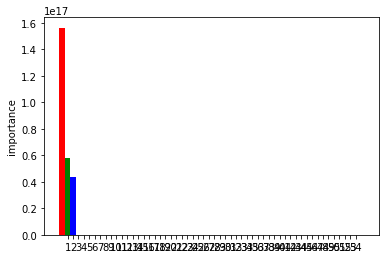

In [12]:
N = 54
ind = np.arange(N)  # the x locations for the groups
width = 1     # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = importance[0:1].squeeze(0)
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = importance[1:2].squeeze(0)
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = importance[2:3].squeeze(0)
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('importance')
ax.set_xticks(ind+width)


# ax.set_xticklabels( (i for i in range(1, 55) ))
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('y', 'z', 'k') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')



plt.show()

ЗАЧЕМ КОД НИЖЕ????????????????????????????????????????????????????????????????????????????????????????????????

In [39]:
# threshold = np.sort(importance)[-3] + .01 # check/modify these values

# tic = time()
# sfm = SelectFromModel(estimator=lasso, threshold=threshold).fit(X, y)
# toc = time()
# #print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
# print(f"Done in {toc - tic:.3f}s")

In [40]:
# print(sfm.estimator_.coef_)
# print(sfm.threshold_)
# print(sfm.get_support)
# print(sfm.transform(X))

In [14]:
X1 = df.iloc[:, :54].values 
y1 = df.iloc[:,54:55].values 

In [15]:
X1.shape

(1936, 54)

In [16]:
y1.shape

(1936, 1)

In [17]:
feature_names = [f"feature {i}" for i in range(X1.shape[1])]

lasso = LassoCV().fit(X1, y1.ravel())
importance = np.abs(lasso.coef_)

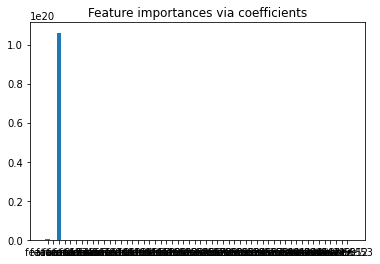

[1.58257794e+17 0.00000000e+00 1.06062602e+20 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [18]:
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()
print(importance)


In [19]:
threshold = np.sort(importance)[-3] + .01 # check/modify these values

tic = time()
sfm = SelectFromModel(estimator=lasso, threshold=threshold).fit(X1, y1)
toc = time()
#print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Done in 0.086s


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
print(sfm.estimator_.coef_)
print(sfm.threshold_)
print(sfm.get_support)
print(sfm.transform(X))

[ 1.58257794e+17  0.00000000e+00 -1.06062602e+20 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00]
0.01
<bound method SelectorMixin.get_support of SelectFromModel(estimator=LassoCV(), threshold=0.01)>
[[0.0000000e+00 1.0

In [24]:
col3 = ["x_s","time_s", "Temp"] + [f"X{i}" for i in range(1, 48)] + ["rho", "v","p"] 

In [34]:
df2=pd.DataFrame(importance, columns=['LassoCV'])
print(df2)


         LassoCV
0   1.582578e+17
1   0.000000e+00
2   1.060626e+20
3   0.000000e+00
4   0.000000e+00
5   0.000000e+00
6   0.000000e+00
7   0.000000e+00
8   0.000000e+00
9   0.000000e+00
10  0.000000e+00
11  0.000000e+00
12  0.000000e+00
13  0.000000e+00
14  0.000000e+00
15  0.000000e+00
16  0.000000e+00
17  0.000000e+00
18  0.000000e+00
19  0.000000e+00
20  0.000000e+00
21  0.000000e+00
22  0.000000e+00
23  0.000000e+00
24  0.000000e+00
25  0.000000e+00
26  0.000000e+00
27  0.000000e+00
28  0.000000e+00
29  0.000000e+00
30  0.000000e+00
31  0.000000e+00
32  0.000000e+00
33  0.000000e+00
34  0.000000e+00
35  0.000000e+00
36  0.000000e+00
37  0.000000e+00
38  0.000000e+00
39  0.000000e+00
40  0.000000e+00
41  0.000000e+00
42  0.000000e+00
43  0.000000e+00
44  0.000000e+00
45  0.000000e+00
46  0.000000e+00
47  0.000000e+00
48  0.000000e+00
49  0.000000e+00
50  0.000000e+00
51  0.000000e+00
52  0.000000e+00
53  0.000000e+00


In [35]:
df2.head()


,LassoCV
0,1.582578e+17
1,0.000000e+00
2,1.060626e+20
3,0.000000e+00
4,0.000000e+00


In [38]:
Lasso_df_N2N= df2.loc[:].reset_index()
Lasso_df_N2N.to_csv('Lasso_N2N.csv', index=False)